In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
from collections import defaultdict, namedtuple
from sklearn.metrics import confusion_matrix
import os
import cv2 as cv
from PIL import Image
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
# from zipfile import ZipFile 
# # archive = zipfile.ZipFile('images.zip', 'r')
# # imgfile = archive.open('img_01.png')
# # # specifying the zip file name 
# # file_name = "gtsrb-german-traffic-sign/gtsrb-german-traffic-sign.zip"

# # opening the zip file in READ mode 
# with ZipFile(file_name, 'r') as zip: 
#     # printing all the contents of the zip file 
# #     zip.printdir() 
  
#     # extracting all the files 
#     print('Extracting all the files now...') 
#     zip.extractall() 
# #     data = zip.read(name_of_file_to_read)
#     print('Done!') 

In [3]:
x_train = []
y_train = []

for i in range(0,43):
    n = str(i)
    train_Path = "gtsrb-german-traffic-sign/Train/" + n
    label = [0 for i in range(0, 43)]
    label[i] = 1
    for filename in os.listdir(train_Path):
        img = cv.imread(train_Path + "/" + filename)
        img = cv.resize(img, (28,28))
        x_train.append(img)
        y_train.append(label)

x_train = np.asarray(x_train)
x_train = x_train/255
x_train = np.asarray(x_train, dtype = "float32")
y_train = np.asarray(y_train, dtype= "float32")         


In [4]:
x_test = []
test_Path = "gtsrb-german-traffic-sign/Test/"
for filename in os.listdir(test_Path):
    if(filename != 'GT-final_test.csv'):
        img = cv.imread(test_Path + "/" + filename)
        img = cv.resize(img, (28,28))
        x_test.append(img)

x_test = np.asarray(x_test)
x_test = x_test/255
x_test = np.asarray(x_test, dtype = "float32")


In [5]:
df = pd.read_csv('gtsrb-german-traffic-sign/Test.csv', index_col=0)
y_test = df['ClassId']
y_test = to_categorical(y_test, num_classes=43)

In [6]:
x_train.shape

(39209, 28, 28, 3)

In [7]:
x_test.shape

(12630, 28, 28, 3)

In [8]:
y_train.shape

(39209, 43)

In [9]:
y_test.shape

(12630, 43)

In [12]:
#Build Model
height = 30
width = 30
channels = 3
num_classes = 43
X_train,X_valid,Y_train,Y_valid = train_test_split(x_train,y_train,test_size = 0.3,random_state=0)
def create_model(activation):
    model = keras.models.Sequential()

    model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation=activation, input_shape=x_train.shape[1:]))
    # model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(rate=0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
    # model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(rate=0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=activation))
    # model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(rate=0.25))

    model.add(Flatten())
    model.add(Dense(256, activation=activation))
    # model.add(Dropout(rate=0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
# Train Model
epochs = 15
model1 = create_model('relu')
history1 = model1.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs,verbose=1)
loss,acc = model1.evaluate(x_test,y_test)
print('loss = ',loss,'acc = ',acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
__________

In [23]:
model2 = create_model('tanh')
history2 = model2.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs,verbose=1)
loss,acc = model2.evaluate(x_test,y_test)
print('loss = ',loss,'acc = ',acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
__________

In [24]:
model4 = create_model('sigmoid')
history4 = model4.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs,verbose=1)
loss,acc = model4.evaluate(x_test,y_test)
print('loss = ',loss,'acc = ',acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
__________

In [39]:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict_classes(x_test)
y_true = df['ClassId']
cnf = confusion_matrix(y_true, y_pred)

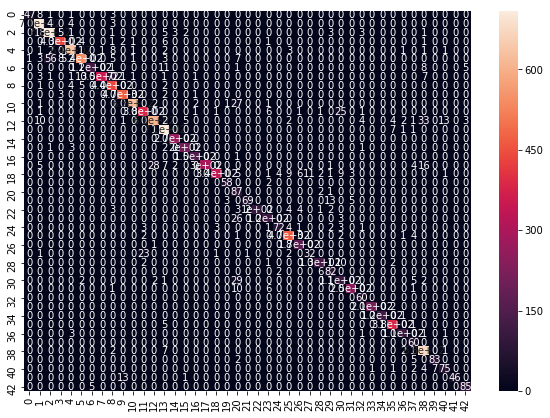

In [40]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cnf, index = [i for i in range(0,43)],
                  columns = [i for i in range(0,43)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

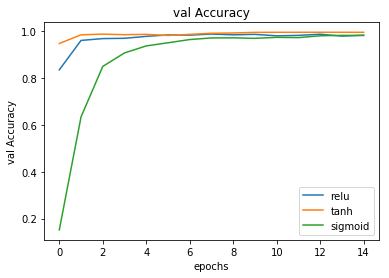

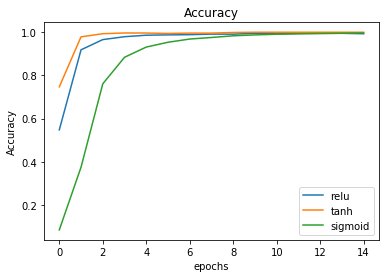

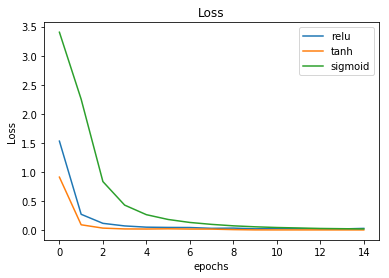

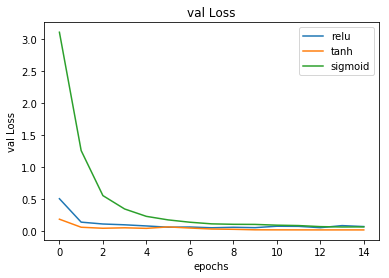

In [25]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history1.history['val_acc'], label='relu')
plt.plot(history2.history['val_acc'], label='tanh')
plt.plot(history4.history['val_acc'], label='sigmoid')
plt.title('val Accuracy')
plt.xlabel('epochs')
plt.ylabel('val Accuracy')
plt.legend()

plt.figure(1)
plt.plot(history1.history['acc'], label='relu')
plt.plot(history2.history['acc'], label='tanh')
plt.plot(history4.history['acc'], label='sigmoid')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(2)
plt.plot(history1.history['loss'], label='relu')
plt.plot(history2.history['loss'], label='tanh')
plt.plot(history4.history['loss'], label='sigmoid')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(3)
plt.plot(history1.history['val_loss'], label='relu')
plt.plot(history2.history['val_loss'], label='tanh')
plt.plot(history4.history['val_loss'], label='sigmoid')
plt.title('val Loss')
plt.xlabel('epochs')
plt.ylabel('val Loss')
plt.legend()

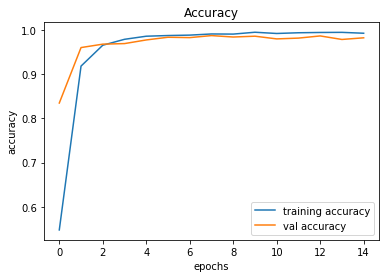

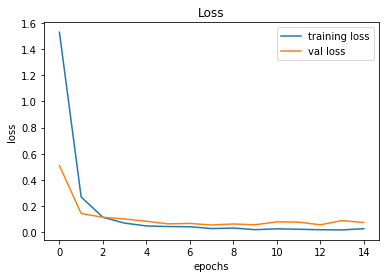

In [26]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history1.history['acc'], label='training accuracy')
plt.plot(history1.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

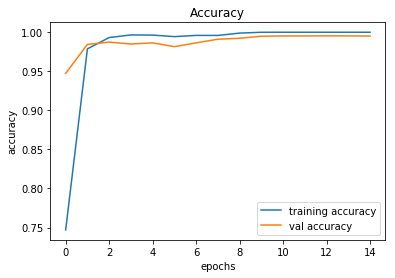

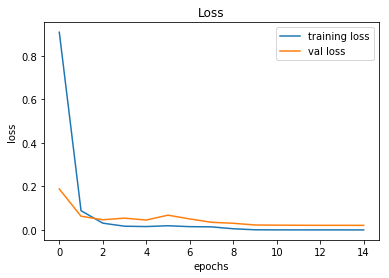

In [27]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history2.history['acc'], label='training accuracy')
plt.plot(history2.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

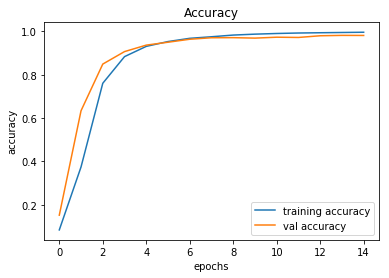

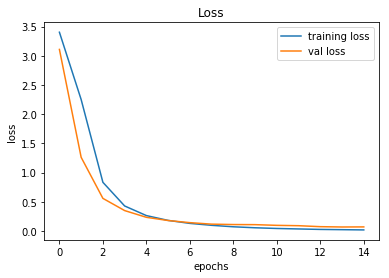

In [28]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history4.history['acc'], label='training accuracy')
plt.plot(history4.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history4.history['loss'], label='training loss')
plt.plot(history4.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [29]:
def create_model3():
    model = keras.models.Sequential()

    model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
#     model.add(Dropout(rate=0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
model3 = create_model2()
history3 = model3.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=100,verbose=1)
loss,acc = model3.evaluate(x_test,y_test)
print('loss = ',loss,'acc = ',acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          36928     
__________

In [18]:
model5 = create_model('relu')
history5 = model5.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=100,verbose=1)
loss,acc = model5.evaluate(x_test,y_test)
print('loss = ',loss,'acc = ',acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
__________

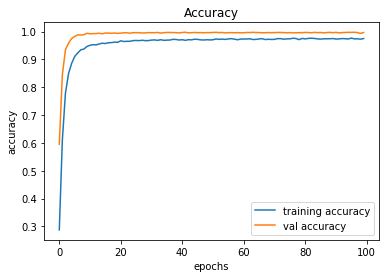

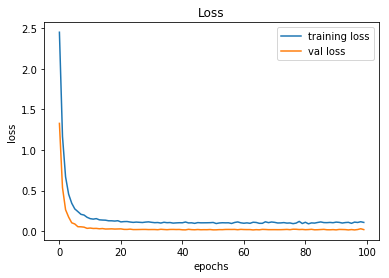

In [15]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history3.history['acc'], label='training accuracy')
plt.plot(history3.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history3.history['loss'], label='training loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [31]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history5.history['acc'], label='training accuracy')
plt.plot(history5.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history5.history['loss'], label='training loss')
plt.plot(history5.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

KeyboardInterrupt: 

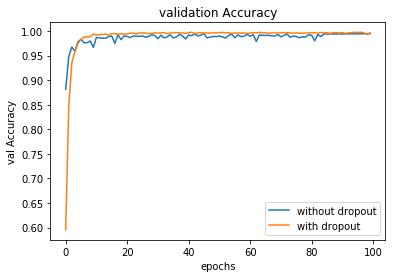

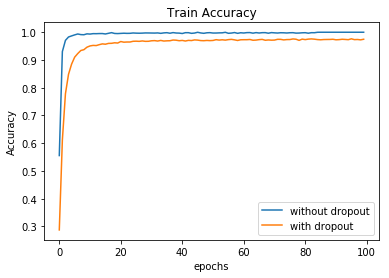

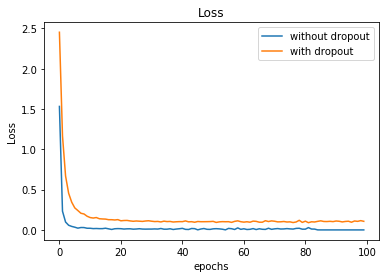

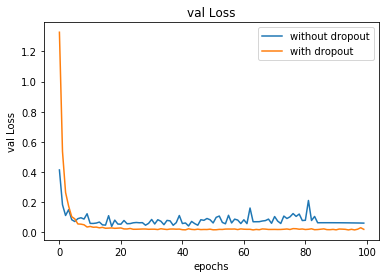

In [21]:
plt.figure(0)
plt.plot(history5.history['val_acc'], label='without dropout')
plt.plot(history3.history['val_acc'], label='with dropout')
plt.title('validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('val Accuracy')
plt.legend()

plt.figure(1)
plt.plot(history5.history['acc'], label='without dropout')
plt.plot(history3.history['acc'], label='with dropout')
plt.title('Train Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(2)
plt.plot(history5.history['loss'], label='without dropout')
plt.plot(history3.history['loss'], label='with dropout')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(3)
plt.plot(history5.history['val_loss'], label='without dropout')
plt.plot(history3.history['val_loss'], label='with dropout')
plt.title('val Loss')
plt.xlabel('epochs')
plt.ylabel('val Loss')
plt.legend()

In [30]:
model6 = create_model3()
history6 = model6.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=100,verbose=1)
loss,acc = model6.evaluate(x_test,y_test)
print('loss = ',loss,'acc = ',acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 64)          36928     
__________

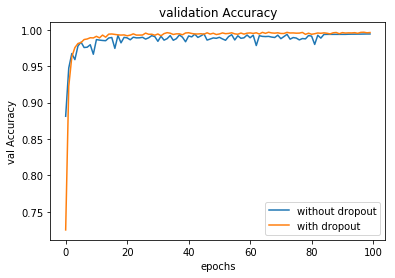

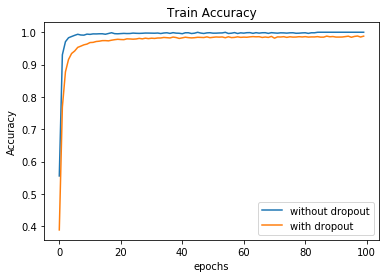

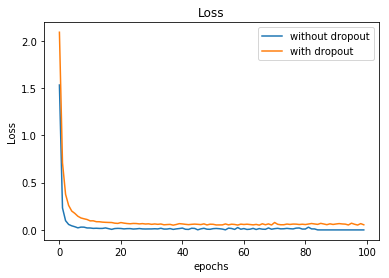

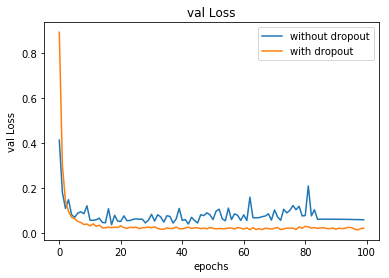

In [32]:
plt.figure(0)
plt.plot(history5.history['val_acc'], label='without dropout')
plt.plot(history6.history['val_acc'], label='with dropout')
plt.title('validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('val Accuracy')
plt.legend()

plt.figure(1)
plt.plot(history5.history['acc'], label='without dropout')
plt.plot(history6.history['acc'], label='with dropout')
plt.title('Train Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(2)
plt.plot(history5.history['loss'], label='without dropout')
plt.plot(history6.history['loss'], label='with dropout')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(3)
plt.plot(history5.history['val_loss'], label='without dropout')
plt.plot(history6.history['val_loss'], label='with dropout')
plt.title('val Loss')
plt.xlabel('epochs')
plt.ylabel('val Loss')
plt.legend()